Final reward estimates: [-31.85370088 -33.53158319 -30.10101532 -32.36887083 -32.35900845
 -29.25199455 -32.98871914 -33.33031377 -30.42636331   8.89099753]


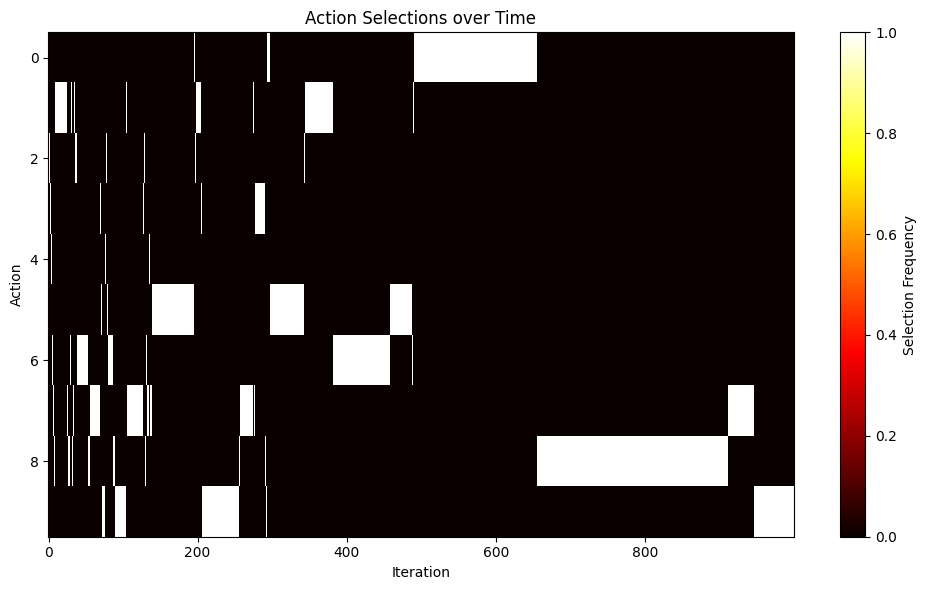

In [38]:
import numpy as np
import matplotlib.pyplot as plt

class WaterAllocationMAB:
    def __init__(self, num_actions, num_groups, reward_functions, learning_rate, exploration_param):
        self.num_actions = num_actions
        self.num_groups = num_groups
        self.reward_functions = reward_functions
        self.learning_rate = learning_rate
        self.exploration_param = exploration_param
        self.action_counts = np.zeros(num_actions)
        self.reward_estimates = np.zeros(num_actions)
    
    def select_action(self, t):
        ucb_scores = self.reward_estimates + self.exploration_param * np.sqrt(np.log(t) / (self.action_counts + 1e-5))
        return np.argmax(ucb_scores)
    
    def update_estimates(self, action, rewards):
        self.action_counts[action] += 1
        self.reward_estimates[action] = (1 - self.learning_rate) * self.reward_estimates[action] + self.learning_rate * np.sum(rewards)

def farmers_happiness(allocation, alpha, mu, sigma, cap):
    if 0 <= allocation <= cap:
        return min(alpha * np.exp(-(allocation - mu)**2 / (2 * sigma**2)), cap)
    else:
        return 0

def urban_happiness(urban_allocation, farmer_allocation, beta, cap):
    return min(beta * urban_allocation + (1 - beta) * farmers_happiness(farmer_allocation, alpha_F, mu_F, sigma_F, cap_F), cap)

def environmental_happiness(allocation, cap, threshold, penalty):
    if allocation >= threshold:
        return cap
    elif 0 <= allocation < threshold:
        return -penalty
    else:
        return 0

# Set model parameters
num_actions = 10
num_groups = 3
learning_rate = 0.1
exploration_param = 1.0
num_iterations = 1000

# Set reward function parameters
alpha_F, mu_F, sigma_F, cap_F = 1.0, 50.0, 20.0, 100.0
beta_U, cap_U = 0.6, 80.0
cap_E, threshold_E, penalty_E = 60.0, 30.0, 100.0

# Define reward functions
reward_functions = [
    lambda alloc: farmers_happiness(alloc, alpha_F, mu_F, sigma_F, cap_F),
    lambda allocations: urban_happiness(allocations[0], allocations[1], beta_U, cap_U),
    lambda alloc: environmental_happiness(alloc, cap_E, threshold_E, penalty_E)
]

# Initialize the multi-armed bandit model
mab = WaterAllocationMAB(num_actions, num_groups, reward_functions, learning_rate, exploration_param)

# Create a matrix to store action selections over time
action_selections = np.zeros((num_iterations, num_actions))

# Run the simulation
for t in range(1, num_iterations + 1):
    action = mab.select_action(t)
    action_selections[t-1, action] = 1
    allocations = np.random.dirichlet(np.ones(num_groups)) * 100  # Generate random allocations summing to 100
    rewards = [reward_functions[i]((allocations[0], allocations[1])) if i == 1 else reward_functions[i](allocations[i]) for i in range(num_groups)]
    mab.update_estimates(action, rewards)

# Print the final reward estimates
print("Final reward estimates:", mab.reward_estimates)

# Visualize action selections over time using a heatmap
plt.figure(figsize=(10, 6))
plt.imshow(action_selections.T, cmap='hot', aspect='auto', interpolation='nearest')
plt.xlabel('Iteration')
plt.ylabel('Action')
plt.title('Action Selections over Time')
plt.colorbar(label='Selection Frequency')
plt.tight_layout()
plt.show()

Final reward estimates: [ -9.08956768 -36.82983687 -35.96377753 -38.01526375 -37.45549545
 -36.13827005 -37.94608102 -37.72003492 -36.68472509 -34.51101537]


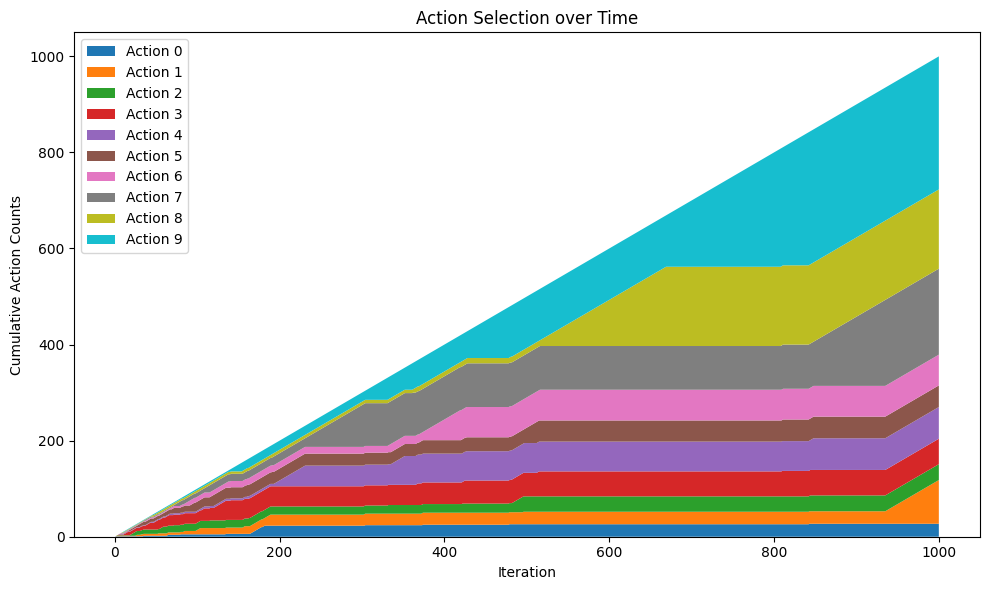

In [41]:



# Print the final reward estimates
print("Final reward estimates:", mab.reward_estimates)

# Calculate the cumulative action counts over time
cumulative_action_counts = np.cumsum(action_counts, axis=0)

# Visualize action selection over time using a stacked area chart
plt.figure(figsize=(10, 6))
plt.stackplot(range(1, num_iterations + 1), cumulative_action_counts.T, labels=[f'Action {i}' for i in range(num_actions)])
plt.xlabel('Iteration')
plt.ylabel('Cumulative Action Counts')
plt.title('Action Selection over Time')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

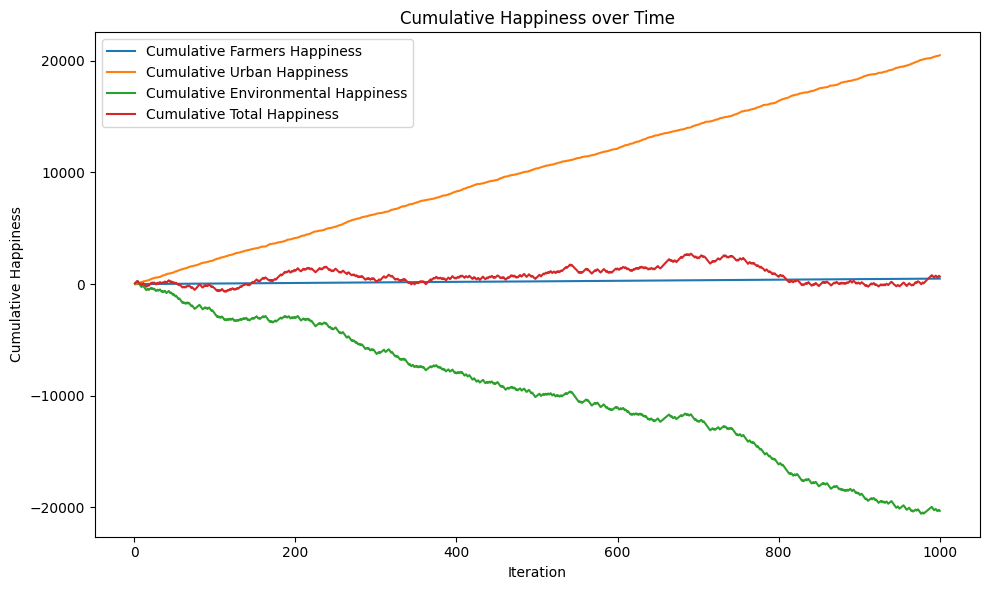

In [46]:
# Initialize the multi-armed bandit model
mab = WaterAllocationMAB(num_actions, num_groups, reward_functions, learning_rate, exploration_param)

# Create arrays to store cumulative happiness values over time
cumulative_farmers_happiness = np.zeros(num_iterations)
cumulative_urban_happiness = np.zeros(num_iterations)
cumulative_environmental_happiness = np.zeros(num_iterations)
cumulative_total_happiness = np.zeros(num_iterations)

# Run the simulation
for t in range(1, num_iterations + 1):
    action = mab.select_action(t)
    allocations = np.random.dirichlet(np.ones(num_groups)) * 100  # Generate random allocations summing to 100
    rewards = [reward_functions[i]((allocations[0], allocations[1])) if i == 1 else reward_functions[i](allocations[i]) for i in range(num_groups)]
    mab.update_estimates(action, rewards)
    
    # Accumulate happiness values for each group
    if t == 1:
        cumulative_farmers_happiness[t-1] = rewards[0]
        cumulative_urban_happiness[t-1] = rewards[1]
        cumulative_environmental_happiness[t-1] = rewards[2]
        cumulative_total_happiness[t-1] = sum(rewards)
    else:
        cumulative_farmers_happiness[t-1] = cumulative_farmers_happiness[t-2] + rewards[0]
        cumulative_urban_happiness[t-1] = cumulative_urban_happiness[t-2] + rewards[1]
        cumulative_environmental_happiness[t-1] = cumulative_environmental_happiness[t-2] + rewards[2]
        cumulative_total_happiness[t-1] = cumulative_total_happiness[t-2] + sum(rewards)

# Plot cumulative happiness values over time
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_iterations + 1), cumulative_farmers_happiness, label='Cumulative Farmers Happiness')
plt.plot(range(1, num_iterations + 1), cumulative_urban_happiness, label='Cumulative Urban Happiness')
plt.plot(range(1, num_iterations + 1), cumulative_environmental_happiness, label='Cumulative Environmental Happiness')
plt.plot(range(1, num_iterations + 1), cumulative_total_happiness, label='Cumulative Total Happiness')
plt.xlabel('Iteration')
plt.ylabel('Cumulative Happiness')
plt.title('Cumulative Happiness over Time')
plt.legend()
plt.tight_layout()
plt.show()